## 3.15 Homework

### Dataset

In this homework, we will continue the New York City Airbnb Open Data. You can take it from
[Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

We'll keep working with the `'price'` variable, and we'll transform it to a classification task.


### Features

For the rest of the homework, you'll need to use the features from the previous homework with additional two `'neighbourhood_group'` and `'room_type'`. So the whole feature set will be set as follows:

* `'neighbourhood_group'`,
* `'room_type'`,
* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`

Select only them and fill in the missing values with 0.


### Question 1

What is the most frequent observation (mode) for the column `'neighbourhood_group'`?

In [1]:
# Ans: Manhattan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
features = ['neighbourhood_group', 'room_type', 'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [6]:
df = df[features]

In [7]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [8]:
df = df.fillna(0)

In [9]:
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [10]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [13]:
df.shape, df_train_full.shape, df_test.shape

((48895, 10), (39116, 10), (9779, 10))

In [14]:
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 42)

In [15]:
df.shape, df_train_full.shape, df_train.shape, df_val.shape, df_test.shape

((48895, 10), (39116, 10), (29337, 10), (9779, 10), (9779, 10))

In [16]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [17]:
y_train = df_train['price'].values
y_val = df_val['price'].values
y_test = df_test['price'].values

In [18]:
del df_train['price']
del df_val['price']
del df_test['price']

In [19]:
df_train.head()

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Entire home/apt,40.72760,-73.94495,3,29,0.70,13,50
1,Manhattan,Private room,40.70847,-74.00498,1,0,0.00,1,7
2,Bronx,Entire home/apt,40.83149,-73.92766,40,0,0.00,1,0
3,Brooklyn,Entire home/apt,40.66448,-73.99407,2,3,0.08,1,0
4,Manhattan,Private room,40.74118,-74.00012,1,48,1.80,2,67


### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Example of a correlation matrix for the car price dataset:

<img src="images/correlation-matrix.png" />

In [20]:
# Ans : number_of_reviews, reviews_per_month

In [21]:
df.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


<AxesSubplot:>

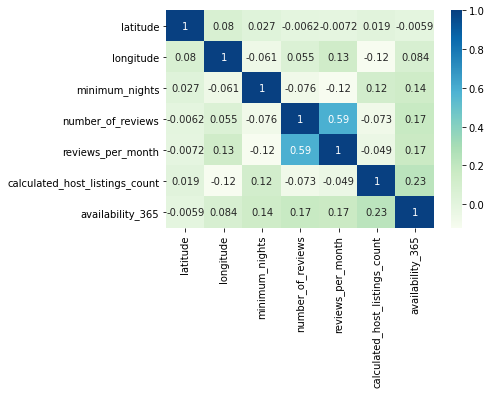

In [22]:
sns.heatmap(df_train.corr(), cmap = "GnBu", annot = True)

### Make price binary

* We need to turn the price variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the price is above (or equal to) `152`.

In [23]:
df.price.mean()

152.7206871868289

In [24]:
len(y_train)

29337

In [25]:
len((y_train >= 152).astype(int))

29337

In [26]:
y_train = (y_train >= 152).astype(int)
y_val = (y_val >= 152).astype(int)
y_test = (y_test >= 152).astype(int)

In [27]:
df['above_average'] = (df.price >=152).astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   room_type                       48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  above_average                   48895 non-null  int32  
dtypes: float64(3), int32(1), int64(5), object(2)
memory usage: 3.9+ MB


### Question 3

* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`

In [29]:
# Ans: room_type

In [30]:
from sklearn.metrics import mutual_info_score

In [31]:
mutual_info_score(df_train['neighbourhood_group'], y_train)

0.04650605348506435

In [32]:
mutual_info_score(df_train['room_type'], y_train)

0.14322617342090396

In [33]:
# Want to read more about mutual information. Here are some links!
# https://stats.stackexchange.com/questions/81659/mutual-information-versus-correlation
# https://www.kaggle.com/ryanholbrook/mutual-information

### Question 4

* Now let's train a logistic regression
* Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
   * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
   * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [34]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [35]:
dv = DictVectorizer(sparse=False)

In [37]:
train_dict = df_train.to_dict(orient='records')

In [38]:
X_train  = dv.fit_transform(train_dict)

In [39]:
val_dict = df_val.to_dict(orient='records')

In [40]:
X_val = dv.transform(val_dict)

In [42]:
lr = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

In [43]:
lr.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=42)

In [46]:
y_pred = lr.predict_proba(X_val)[:, 1]

In [50]:
original_accuracy = round((y_val == (y_pred >= 0.5).astype(int)).mean(),2)

### Question 5

* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `neighbourhood_group`
   * `room_type` 
   * `number_of_reviews`
   * `reviews_per_month`

> **note**: the difference doesn't have to be positive

In [52]:
features = ['neighbourhood_group', 'room_type', 'latitude', 'longitude','minimum_nights', 
            'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
           'availability_365']

In [55]:
def feature_elimination(df, features, original_accuracy):
  
    df_f=df.copy()
    df_f_fulltrain,df_f_test = train_test_split(df_f,test_size=0.2,random_state=42)
    df_f_train,df_f_val = train_test_split(df_f_fulltrain,test_size=0.25,random_state=42)

    df_f_train = df_f_train.reset_index(drop = True)
    df_f_val = df_f_val.reset_index(drop = True)
    df_f_test = df_f_test.reset_index(drop = True)

    y_f_train = df_f_train.above_average.values
    y_f_val = df_f_val.above_average.values
    y_f_test = df_f_test.above_average.values
    
    
    target = ['price','above_average']

    df_f_train.drop(target, axis = 1, inplace=True)
    df_f_val.drop(target, axis = 1, inplace=True)
    df_f_test.drop(target, axis = 1, inplace=True)
    
    for feat in features:
        df_f_train = df_f_train.copy()
        df_f_val = df_f_val.copy()
        df_f_test = df_f_test.copy()
        
        df_train_i = df_f_train.drop(feat, axis = 1)
        df_val_i = df_f_val.drop(feat, axis = 1)
        df_test_i = df_f_test.drop(feat, axis = 1)
        print(df_test_i.columns)
        
        dv = DictVectorizer(sparse=False)
        train_dict = df_train_i.to_dict(orient='records')
        X_f_train  = dv.fit_transform(train_dict)
        val_dict = df_val_i.to_dict(orient='records')
        X_f_val = dv.transform(val_dict)
        model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
        model.fit(X_f_train,y_f_train)

        y_f_pred = model.predict_proba(X_f_val)[:, 1]

        above_average_decision = (y_f_pred >= 0.5).astype(int)

        print('excluded_{}_accuracy is :'.format(feat), round((y_f_val == above_average_decision).mean(),2))
        print('excluded_{}_accuracy_diff is :'.format(feat),(original_accuracy - round((y_f_val == above_average_decision).mean(),2)))
#         print(dv.get_feature_names())
        print()
        print()

In [56]:
feature_elimination(df, features, original_accuracy)

Index(['room_type', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
excluded_neighbourhood_group_accuracy is : 0.75
excluded_neighbourhood_group_accuracy_diff is : 0.040000000000000036


Index(['neighbourhood_group', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


excluded_room_type_accuracy is : 0.72
excluded_room_type_accuracy_diff is : 0.07000000000000006


Index(['neighbourhood_group', 'room_type', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


excluded_latitude_accuracy is : 0.79
excluded_latitude_accuracy_diff is : 0.0


Index(['neighbourhood_group', 'room_type', 'latitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


excluded_longitude_accuracy is : 0.79
excluded_longitude_accuracy_diff is : 0.0


Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


excluded_minimum_nights_accuracy is : 0.79
excluded_minimum_nights_accuracy_diff is : 0.0


Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude',
       'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


excluded_number_of_reviews_accuracy is : 0.79
excluded_number_of_reviews_accuracy_diff is : 0.0


Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


excluded_reviews_per_month_accuracy is : 0.79
excluded_reviews_per_month_accuracy_diff is : 0.0


Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')


c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


excluded_calculated_host_listings_count_accuracy is : 0.79
excluded_calculated_host_listings_count_accuracy_diff is : 0.0


Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count'],
      dtype='object')
excluded_availability_365_accuracy is : 0.78
excluded_availability_365_accuracy_diff is : 0.010000000000000009




c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`

In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
alpha = [0, 0.01, 0.1, 1, 10]

In [60]:
df_linear = df.copy()
df_linear['price'] = np.log1p(df.price)
df_f_fulltrain,df_f_test = train_test_split(df_lin,test_size=0.2,random_state=42)
df_f_train,df_f_val = train_test_split(df_f_fulltrain,test_size=0.25,random_state=42)

df_f_train = df_f_train.reset_index(drop = True)
df_f_val = df_f_val.reset_index(drop = True)
df_f_test = df_f_test.reset_index(drop = True)

y_f_train = df_f_train.price.values
y_f_val = df_f_val.price.values
y_f_test = df_f_test.price.values

target = ['price','above_average']

df_f_train.drop(target, axis = 1, inplace=True)
df_f_val.drop(target, axis = 1, inplace=True)
df_f_test.drop(target, axis = 1, inplace=True)

dv = DictVectorizer(sparse=False)
train_dict = df_f_train.to_dict(orient='records')
X_f_train  = dv.fit_transform(train_dict)
val_dict = df_f_val.to_dict(orient='records')
X_f_val = dv.transform(val_dict)

In [61]:
def ridge_regression (df, alpha_value):  
    model = Ridge(alpha= alpha_value, random_state=42)
    model.fit(X_f_train,y_f_train)
    y_f_pred = model.predict(X_f_val)
    rmse = mean_squared_error(y_f_val, y_f_pred, squared=False)
    print('If alpha is {} then RMSE is :'.format(alpha_value),round(rmse,4))

In [63]:
for al in alpha:
    ridge_regression(df,al)

If alpha is 0 then RMSE is : 0.4971
If alpha is 0.01 then RMSE is : 0.4971
If alpha is 0.1 then RMSE is : 0.4971
If alpha is 1 then RMSE is : 0.4971
If alpha is 10 then RMSE is : 0.4979


c:\python\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.50558e-21): result may not be accurate.
  overwrite_a=True).T


.


## Submit the results

Submit your results here: https://forms.gle/xGpZhoq9Efm9E4RA9

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline

The deadline for submitting is 27 September 2021, 17:00 CET. After that, the form will be closed.


## Nagivation

* [Machine Learning Zoomcamp course](../)
* [Session 3: Machine Learning for Classification](./)
* Previous: [Explore more](14-explore-more.md)